# Super Resolution

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from skimage import data


In [6]:
import gdown
file_id = "1pVlr46JkujqGXq7HD5QZ2UEBT_SLAJOj"
output = "/content/bird.jpg"
gdown.download(id=file_id, output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1pVlr46JkujqGXq7HD5QZ2UEBT_SLAJOj
To: /content/bird.jpg
100%|██████████| 44.4k/44.4k [00:00<00:00, 48.6MB/s]


'/content/bird.jpg'

# Part 1. High & Low resolution

Original image : high-resolution

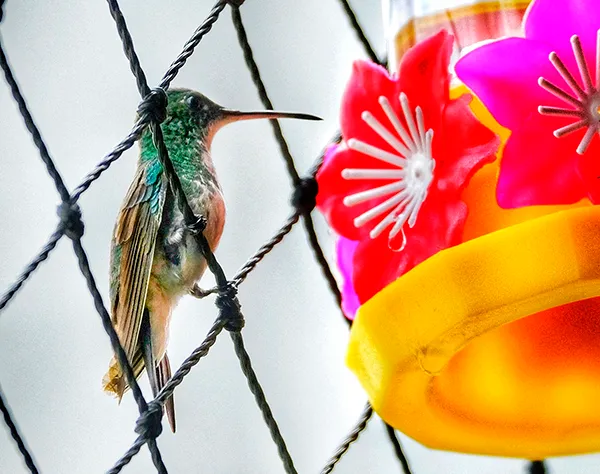

(474, 600, 3)


In [7]:
# Load high-resolution image named 'image'.
image_cv = cv.imread('/content/bird.jpg')
image = np.array(image_cv)
cv2_imshow(image)
print(image.shape)

Make orignal image to low-resolution image for our future upsampling.

>

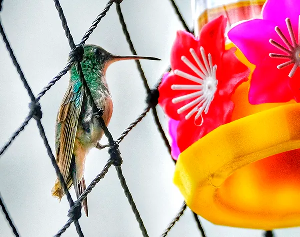

(237, 300, 3)


In [8]:
# Sample 1 pixel over 2 pixels. Name it 'image_low'.
image_low = image[::2,::2,:]
cv2_imshow(image_low)
print(image_low.shape)

# Part 2. Bilinear interpolation

Apply bilinear interpolation to low-resolution image to make it high resolution.



### Bilinear interpolation : Easy way with cv function

You can compare bilinear reconstructed image(left) with high-resolution image(right) &

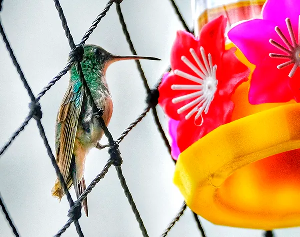

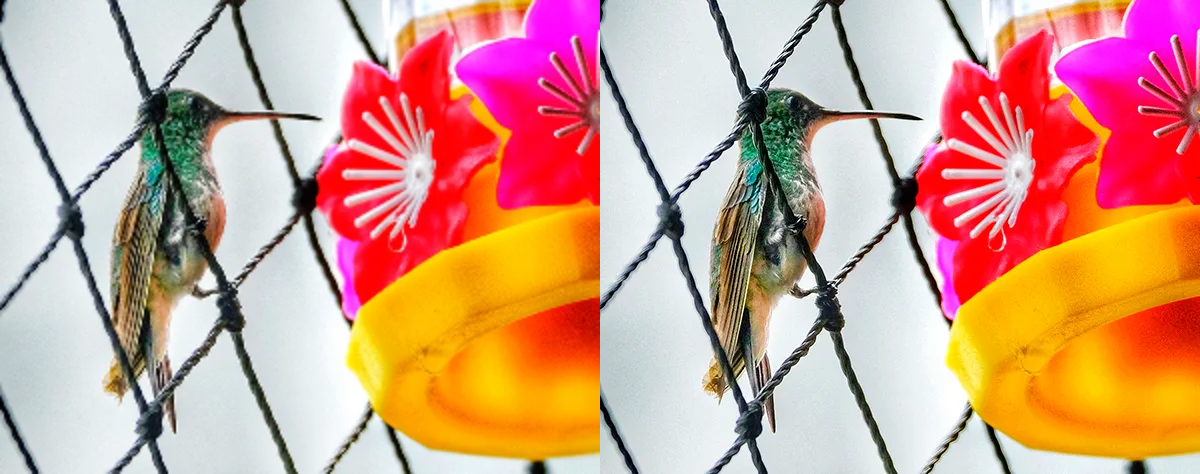

In [9]:
bilinear_image = cv.resize(image_low, dsize=(600,474),interpolation=cv.INTER_LINEAR)    # Bilinear interpolation with cv.resize function.
cv2_imshow(image_low)                                                           # down-sampled low resolution image
cv2_imshow(np.concatenate((bilinear_image,image),axis=1))                       # Left : Bilinear - reconstructed image, Right : Original high-resolution image.

## Code your own bilinear interpolater!

**Concept** : following figure

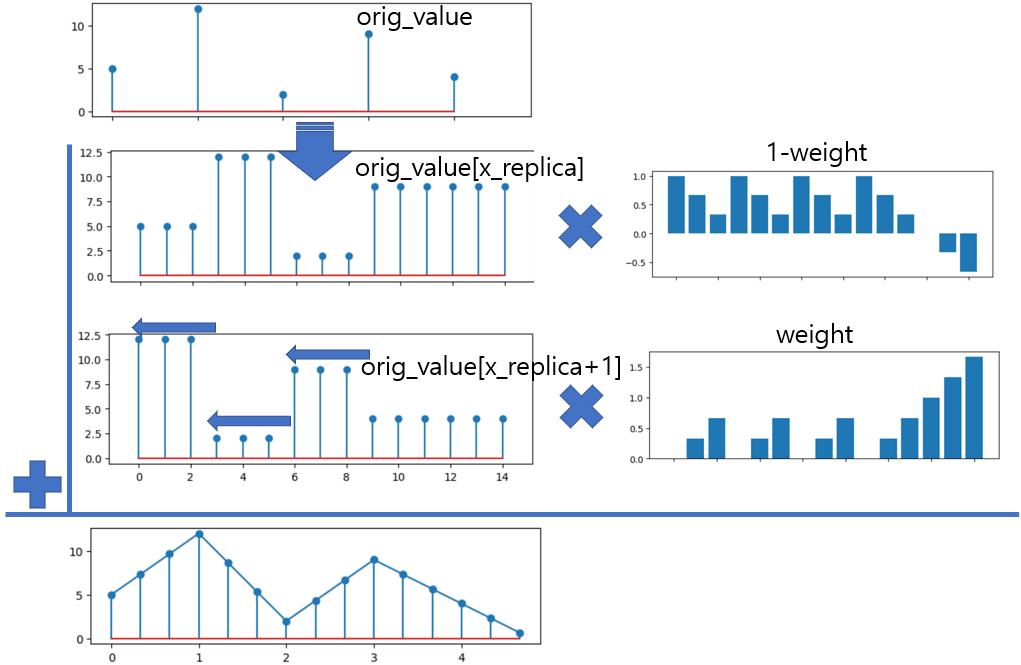

### Before starting HW 1, let me introduce the concept of code.

In [10]:
## Make image have *(ratio) times bigger == *(ratio) times Higher Resolution!
ratio = 3

orig_value = np.array([1,5,8,4,6])                                              # orig_value : y value in low-resolution signal
x_orig = np.arange(5)                                                           # x_orig : x coordinate of low-resolution signal
L = x_orig.shape                                                                # L : length of orig
print('x_orig',x_orig)

x_hr = np.arange(L[0]*ratio) / ratio                                            # x_hr = high-resolution x axis array (length of orig x axis * ratio) = 15 in this case.
print('x_hr',np.round(x_hr,2))

x_replica = np.floor(x_hr).astype(np.int32)                                       # copy pixel location to augmented empty pixel
x_replica = np.minimum(x_replica,L[0]-2)
print('x_replica',x_replica)

weight = x_hr - x_replica
print('weight',np.round(weight,2))

# interpolation
out = (1-weight) * orig_value[x_replica] + weight * orig_value[x_replica+1]

x_orig [0 1 2 3 4]
x_hr [0.   0.33 0.67 1.   1.33 1.67 2.   2.33 2.67 3.   3.33 3.67 4.   4.33
 4.67]
x_replica [0 0 0 1 1 1 2 2 2 3 3 3 3 3 3]
weight [0.   0.33 0.67 0.   0.33 0.67 0.   0.33 0.67 0.   0.33 0.67 1.   1.33
 1.67]


<StemContainer object of 3 artists>

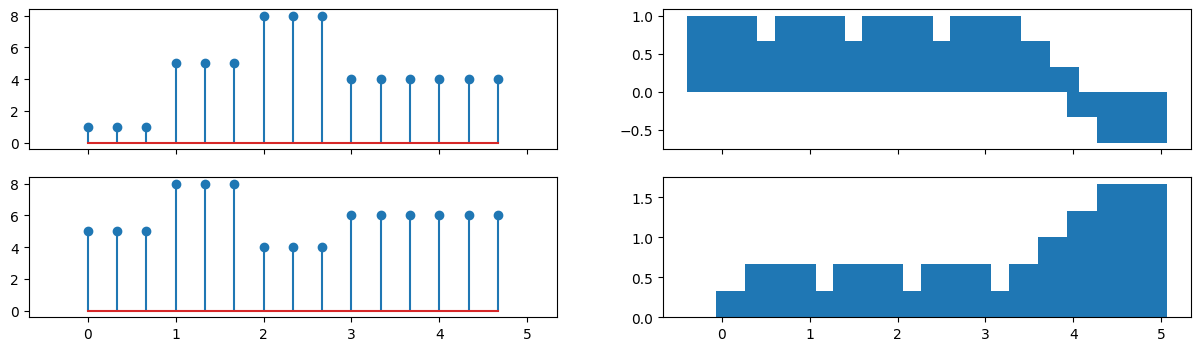

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,4))
axes[0,1].bar(x_hr,1-weight)
axes[0,0].stem(x_hr,orig_value[x_replica])
axes[1,1].bar(x_hr,weight)
axes[1,0].stem(x_hr,orig_value[x_replica+1])

<StemContainer object of 3 artists>

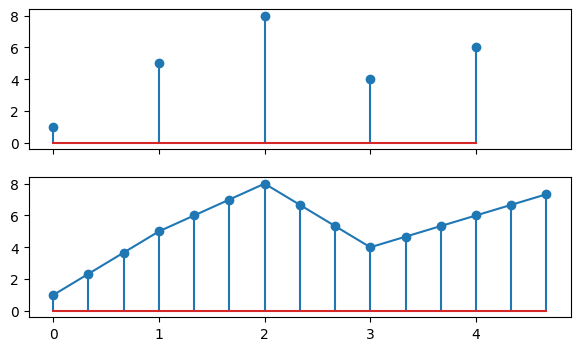

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7,4))
ax1.stem(x_orig,orig_value)
ax2.plot(x_hr,out)
ax2.stem(x_hr,out)

### HW 1) Fill in the blank in order to make bilinear interpolater.

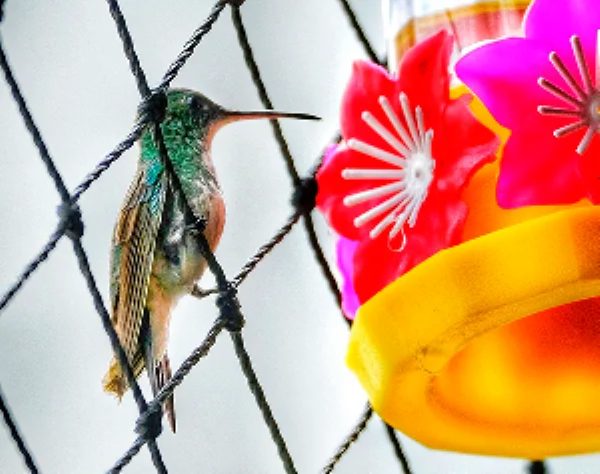

In [13]:
# Bi-Linear interpolation
def bl_interpolate(img, ax=1., ay=1.):
    H, W, C = img.shape
    # Caution! : H corresponds to y, and W corresponds to x.
    aH = int(ay * H)
    aW = int(ax * W)

    # hint : variable 'x_hr'
    y_hr = np.arange(aH).repeat(aW).reshape(aH, -1) / ay
    # x_hr : same as y_hr + '.transpose(1,0)' function
    x_hr = np.arange(aW).repeat(aH).reshape(aW, -1).transpose(1,0) / ax

    # hint : variable 'x_replica'
    x_replica = np.floor(x_hr).astype(np.int32)
    y_replica = np.floor(y_hr).astype(np.int32)
    x_replica = np.minimum(x_replica, W-2)
    y_replica = np.minimum(y_replica, H-2)

    # hint : variable 'weight' == dx, dy
    dx = x_hr - x_replica
    dy = y_hr - y_replica
    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

    # interpolation
    # hint : 2 terms for 1D. Then how many terms for 2D?
    out = (1-dx) * (1-dy) * img[y_replica, x_replica] + dx * (1-dy) * img[y_replica, x_replica+1] + (1-dx) * dy * img[y_replica+1, x_replica] + dx * dy * img[y_replica+1, x_replica+1]


    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Bilinear interpolation
bilinear_image_own = bl_interpolate(image_low, ax=2, ay=2)

# Save result
cv2_imshow(bilinear_image_own)

# Part 3. Bicubic interpolation

This part will show example of bicubic interpolation using cv.resize function

(474, 600, 3)


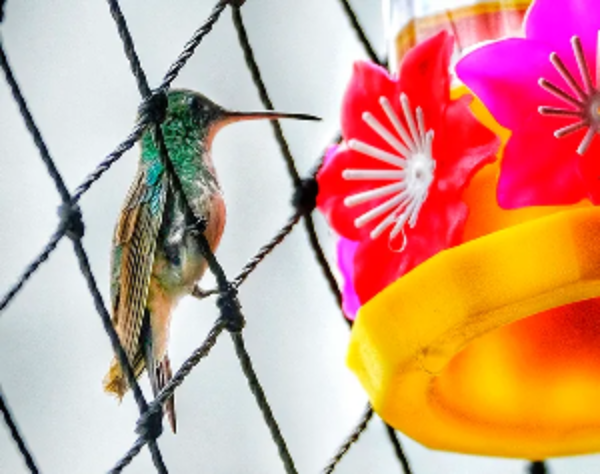

In [14]:
bicubic_image = cv.resize(image_low, dsize=(600,474),interpolation=cv.INTER_CUBIC)
print(bilinear_image.shape)
cv2_imshow(bilinear_image)

# Part 4. Sinc interpolation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

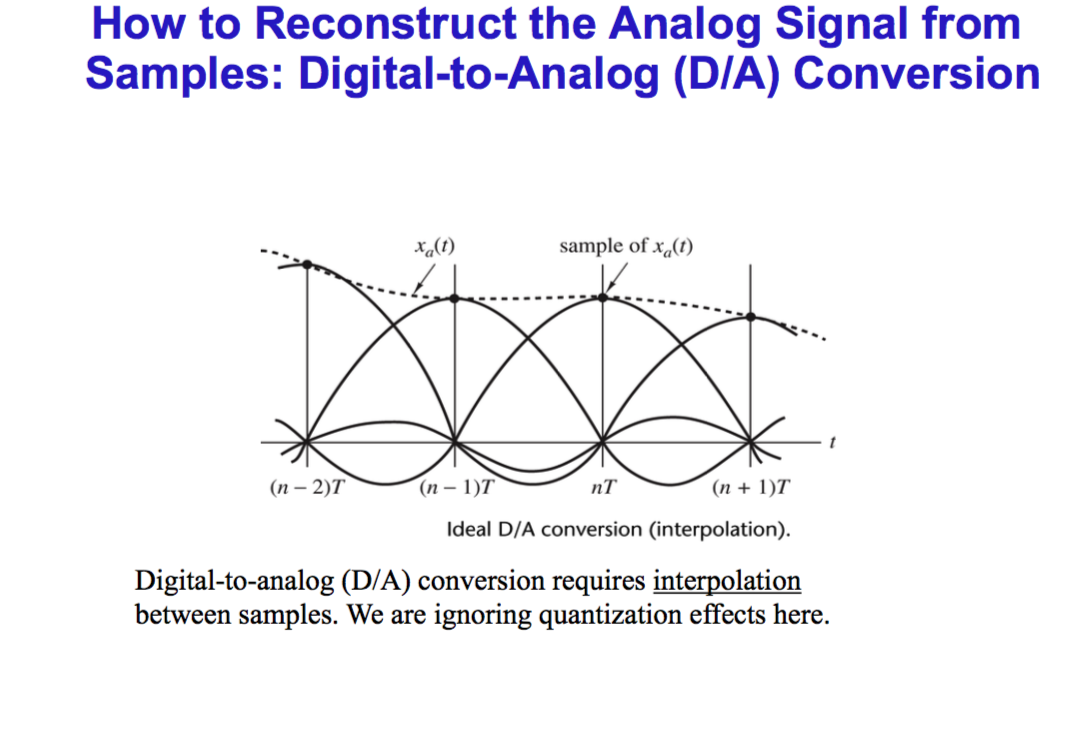

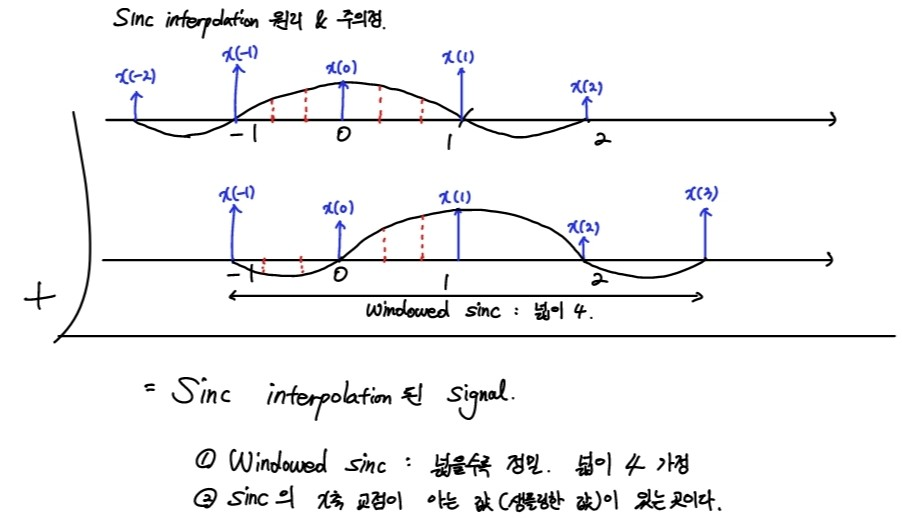
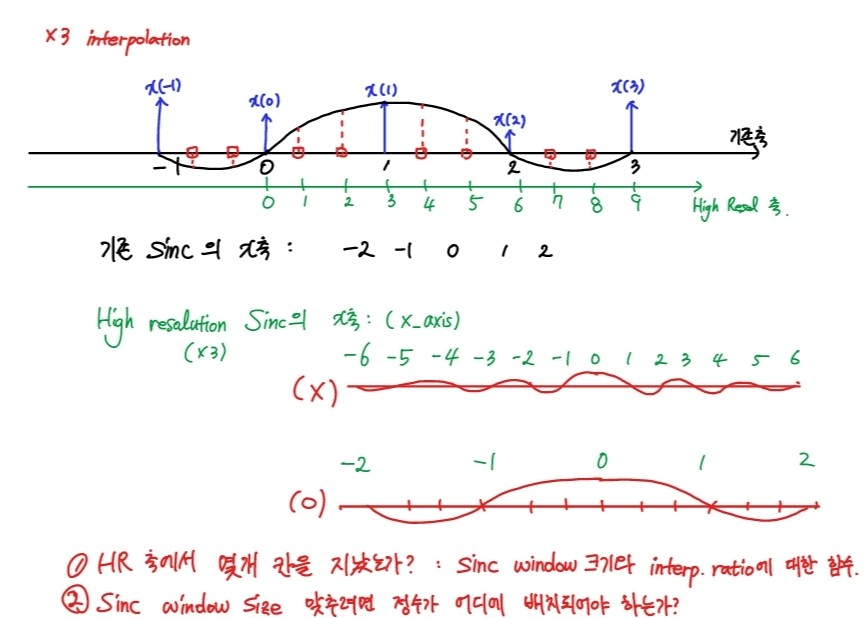

### HW2) Fill in the blank code.

In [20]:
def create_2d_sinc_kernel(period_x, period_y, length_x, length_y):
    """
    Create a 2D sinc kernel based on given periods and lengths for x and y axes.

    Parameters:
        period_x (float): Period of the sinc function along the x-axis.
        period_y (float): Period of the sinc function along the y-axis.
        length_x (int): Maximum absolute value of the kernel along the x-axis.
        length_y (int): Maximum absolute value of the kernel along the y-axis.

    Returns:
        kernel (numpy.ndarray): 2D sinc kernel of shape (length_y*(period_y)*2+1, length_x*(period_x)*2+1).
        input variable 'period_x,y' is up_factor.
    """
    # Create coordinate grids
    # Use np.linspace,
    x = np.linspace(-length_x, length_x, 2 * length_x * period_x + 1)
    y = np.linspace(-length_y, length_y, 2 * length_y * period_y + 1)
    xx, yy = np.meshgrid(x, y, indexing='xy')

    # Compute the 2D sinc kernel
    kernel = np.sinc(xx) * np.sinc(yy)

    plt.imshow(kernel)

    return kernel

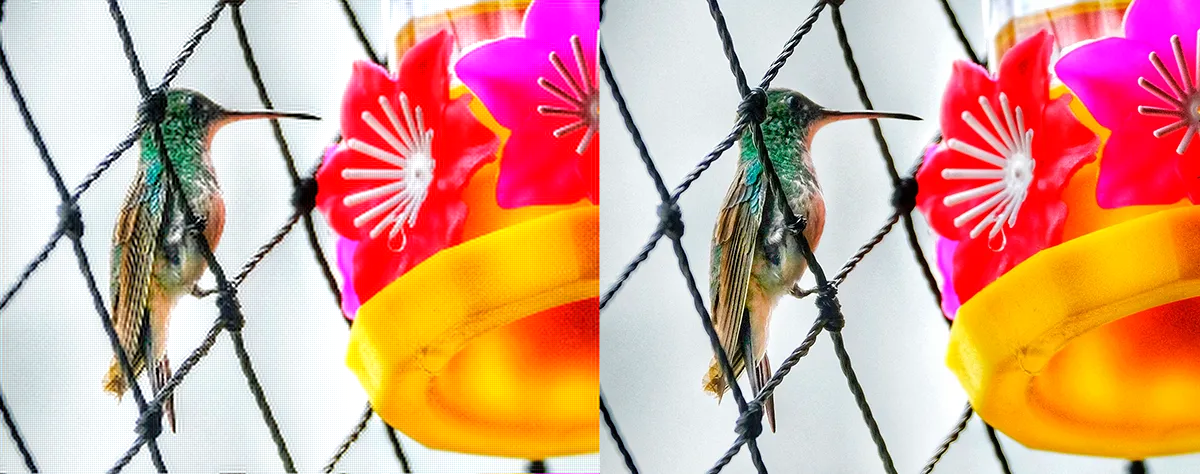

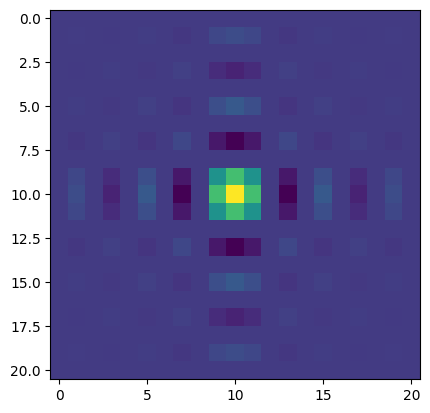

In [21]:
# Upsampling factor
up_factor = 2

# Start with low resolution image, image_low
# Dimensions of the original image
H, W, C = image_low.shape

# Create an upscaled empty image
upscaled_image = np.zeros((up_factor*H, up_factor*W, 3))

# Copy the original image pixels to the new image with gaps
upscaled_image[::up_factor, ::up_factor] = image_low                                      # [###,###] #내용을 바꿔주세요.

# Create the sinc interpolation kernel
kernel_size = 11                                                                # N by N kernel, kernel_size=N. better choose odd number
sinc_kernel = create_2d_sinc_kernel(up_factor,up_factor,int((kernel_size-1)/2),int((kernel_size-1)/2))
# kernel_size는 interpolation하기 전 좌표계에서 windowed sinc의 길이가 -5 ~ 5 라는 의미입니다.
# create_2d_sinc_kernel 함수는 interpolation 전 kernel을 interpolation 후 좌표계에서 표현해주는 함수입니다.
# interpolation후 좌표계에서, windowed sinc는 기존과 같이 -5 ~5 의 값 위에서 정의되어야 하지만, 한 칸이 기존 좌표계 기준 0.5를 의미하므로 더 잘게 쪼개서 11칸이 아닌 21칸으로 쪼개야 합니다.
# up_factor=2 일때, kernel size는 interpolation전 좌표계에서 11칸이라면 interpolation후 좌표계에서 21칸으로 표현됩니다.
# 하지만 sinc kernel의 첫값과 끝값은 -5, 5로 각각 일정하게 유지되어야 합니다.

# Convolve the kernel with the image
sinc_image = np.zeros(upscaled_image.shape)
sinc_image[:,:,0] = convolve2d(upscaled_image[:,:,0], sinc_kernel, mode='same', boundary='wrap')
sinc_image[:,:,1] = convolve2d(upscaled_image[:,:,1], sinc_kernel, mode='same', boundary='wrap')
sinc_image[:,:,2] = convolve2d(upscaled_image[:,:,2], sinc_kernel, mode='same', boundary='wrap')

# Plot the original and upsampled images
cv2_imshow(np.concatenate((sinc_image,image),axis=1))


# Part 5. Compare each interpolation methods

1. Low-resolution
2. Bilinear
3. Bicubic
4. Sinc


['Low resolution', 'Bilinear', 'Bicubic', 'Sinc', 'High resolution']


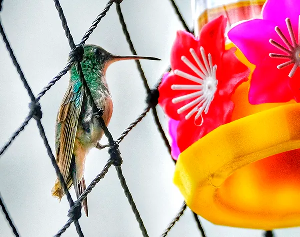

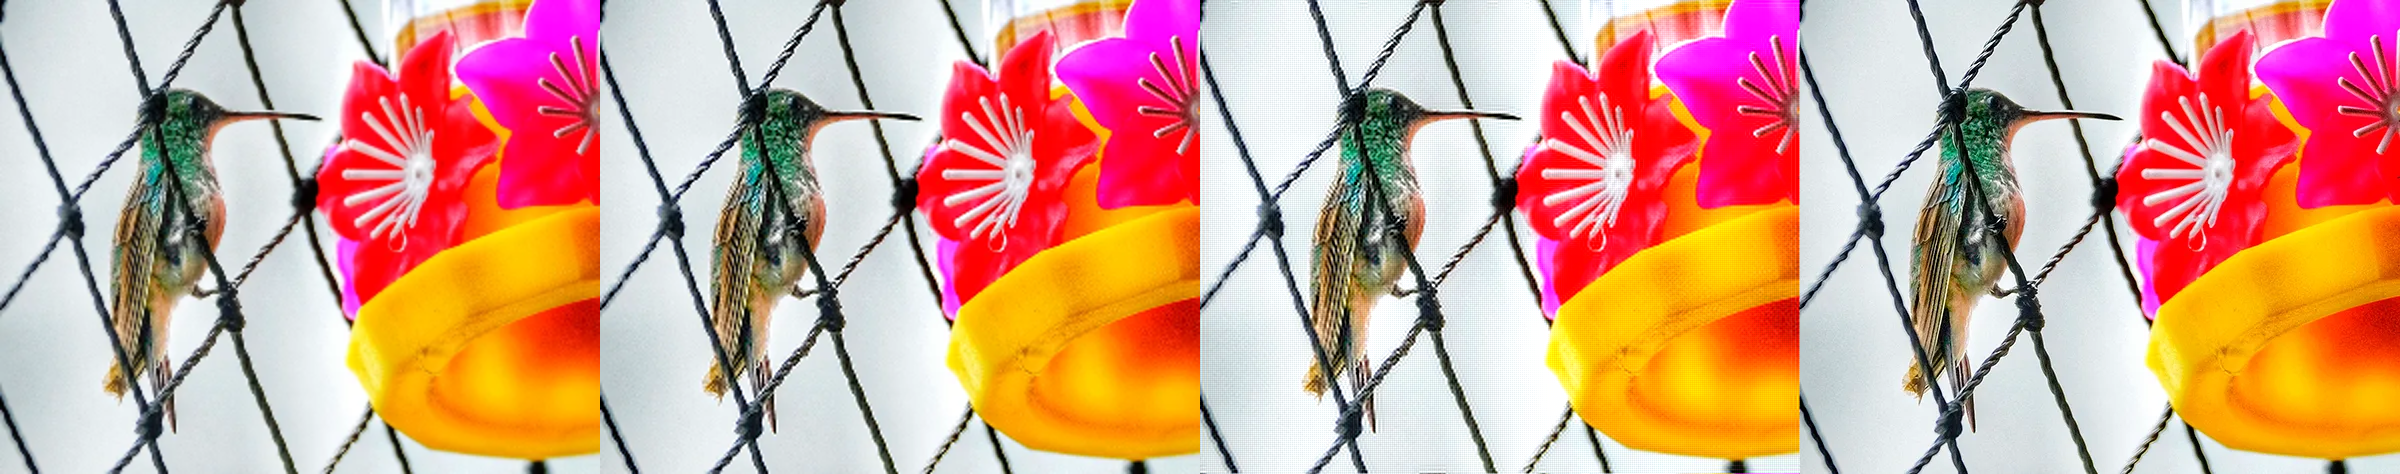

In [22]:
images = [image_low,bilinear_image, bicubic_image, sinc_image, image]
titles = ["Low resolution","Bilinear", "Bicubic","Sinc", "High resolution"]
print(titles)

cv2_imshow(image_low)
cv2_imshow(np.concatenate((bilinear_image, bicubic_image, sinc_image, image), axis=1))